In [2]:
# data
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.util import dataframe_utils

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter


In [3]:
log = xes_importer.apply('process_mining_log.xes')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
df = pd.read_csv('process_mining.csv')
df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = df.sort_values('time:timestamp')

log = log_converter.apply(df)

In [5]:
df.sort_values(['case:concept:name', 'time:timestamp']).reset_index(drop=True)

,Activity,Costs,Resource,case:concept:name,case:creator,concept:name,org:resource,time:timestamp
0,register request,50,Pete,1,Fluxicon Nitro,register request,Pete,2010-12-30 10:02:00+00:00
1,examine thoroughly,400,Sue,1,Fluxicon Nitro,examine thoroughly,Sue,2010-12-31 09:06:00+00:00
2,check ticket,100,Mike,1,Fluxicon Nitro,check ticket,Mike,2011-01-05 14:12:00+00:00
3,decide,200,Sara,1,Fluxicon Nitro,decide,Sara,2011-01-06 10:18:00+00:00
4,reject request,200,Pete,1,Fluxicon Nitro,reject request,Pete,2011-01-07 13:24:00+00:00
5,register request,50,Mike,2,Fluxicon Nitro,register request,Mike,2010-12-30 10:32:00+00:00
6,check ticket,100,Mike,2,Fluxicon Nitro,check ticket,Mike,2010-12-30 11:12:00+00:00
7,examine casually,400,Sean,2,Fluxicon Nitro,examine casually,Sean,2010-12-30 13:16:00+00:00
8,decide,200,Sara,2,Fluxicon Nitro,decide,Sara,2011-01-05 10:22:00+00:00
9,pay compensation,200,Ellen,2,Fluxicon Nitro,pay compensation,Ellen,2011-01-08 11:05:00+00:00


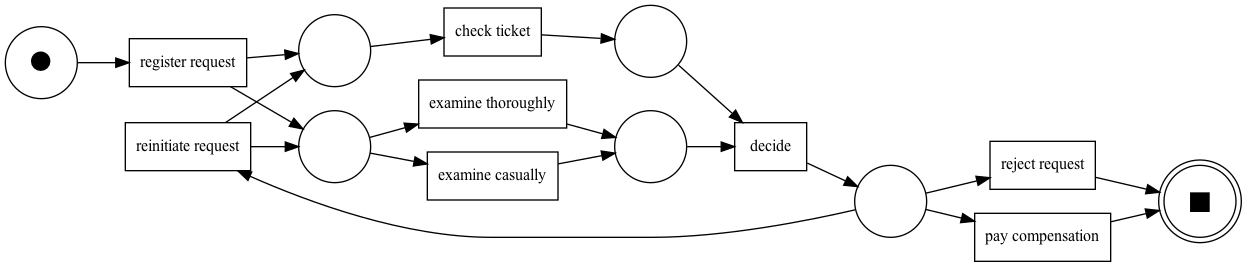

In [6]:
# alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [7]:
# add information about frequency to the viz 
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

# save the Petri net
pn_visualizer.save(gviz, "alpha_miner_petri_net.png")

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

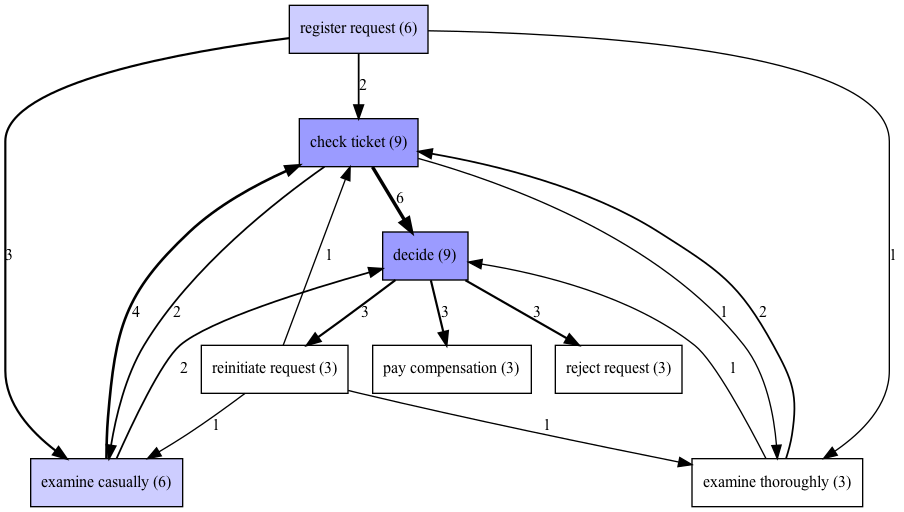

In [8]:
# creatig the graph from log
dfg = dfg_discovery.apply(log)

# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)


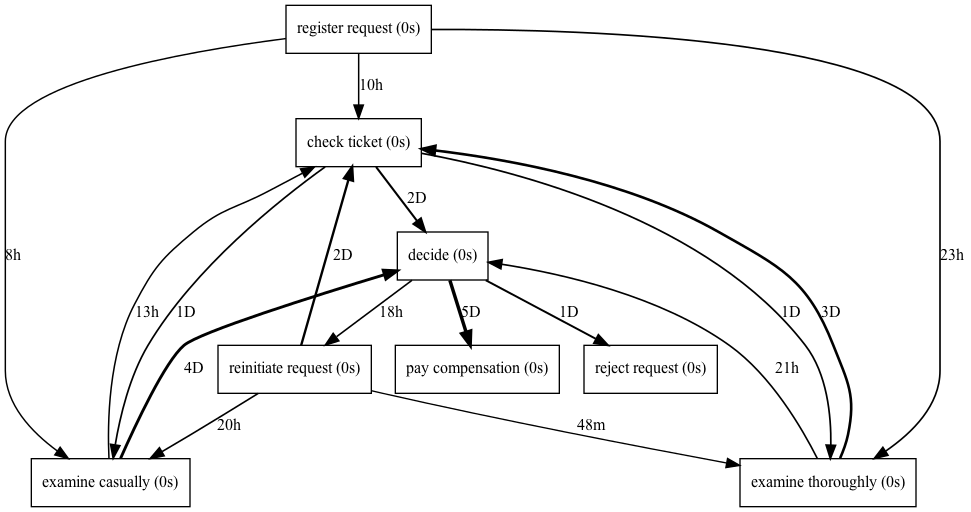

In [9]:
# creatig the graph from log
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

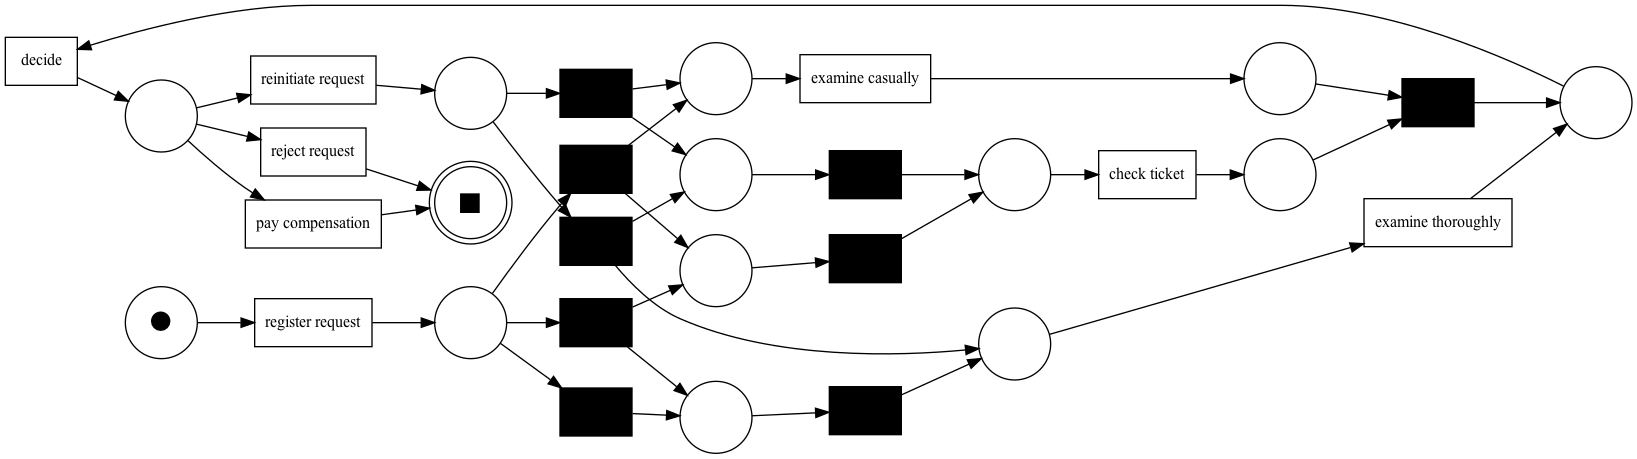

In [10]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)